In [36]:
from pynq import Overlay

OL = Overlay("/home/xilinx/pynq/overlays/WholeNetwork/design_1_wrapper.bit")
OL.ip_dict

{'axi_dma': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xb0297550>,
  'driver': pynq.lib.dma.DMA,
  'fullpath': 'axi_dma',
  'gpio': {},
  'interrupts': {},
  'mem_id': 'S_AXI_LITE',
  'parameters': {'C_BASEADDR': '0x40410000',
   'C_DLYTMR_RESOLUTION': '125',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_FAMILY': 'zynq',
   'C_HIGHADDR': '0x4041FFFF',
   'C_INCLUDE_MM2S': '1',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_MM2S_SF': '1',
   'C_INCLUDE_S2MM': '1',
   'C_INCLUDE_S2MM_DRE': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_INCLUDE_SG': '0',
   'C_INCREASE_THROUGHPUT': '0',
   'C_MICRO_DMA': '0',
   'C_MM2S_BURST_SIZE': '16',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '16',
   'C_M_AXI_MM2S_ADDR_WIDTH': '64',
   'C_M_AXI_MM2S_DATA_WIDTH': '64',
   'C_M_AXI_S2MM_ADDR_WIDTH': '64',
   'C_M_AXI_S2MM_DATA_WIDTH': '64',
   'C_M_AXI_SG_ADDR_WIDTH': '64',
   'C_M_AXI_SG_DATA_WIDTH': '32',
   'C_NUM_MM2S_CHANNELS': '1',
   'C_NUM_S2MM_CHA

In [37]:
from pynq import MMIO
dma_addr = OL.ip_dict["axi_dma"]["phys_addr"]
dma_addr_range = OL.ip_dict["axi_dma"]["addr_range"]
print(hex(dma_addr), hex(dma_addr_range))
dma = MMIO(dma_addr, dma_addr_range, False)

network = OL.network_0

0x40410000 0x10000


In [38]:
"""Register Map"""

MM2S_DMACR = 0x00 # MM2S DMA Ctrl
MM2S_DMASR = 0x04 # MM2S DMA Status
MM2S_SA = 0x18 # MM2S Source ADDR
MM2S_LENGTH = 0x28 # MM2S Data Length

S2MM_DMACR = 0x30 # S2MM DMA Ctrl
S2MM_DMASR = 0x34 # S2MM DMA Status
S2MM_DA = 0x48 # S2MM Destination ADDR
S2MM_LENGTH = 0x58 # S2MM Data Length

In [39]:
import numpy as np
test_data = np.array(
    [0,    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,  5396, 11885, 10215,  9701,  3854,  2312,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0, 14262, 16318, 16318, 16318, 16318, 15483, 12720, 12720, 12720, 12720, 12720, 12720, 12720, 12720, 10922,  3340,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,  4304,  7324,  4625,  7324, 10472, 14584, 16318, 14455, 16318, 16318, 16318, 16061, 14712, 16318, 16318,  8994,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1092,  4240,   899,  4304,  4304,  4304,  3790,  1349, 15162, 16318,  6810,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  5332, 16254, 13427,  1156,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1413, 14969, 16383,  5332,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8287, 16318, 15290,  2826,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  3790, 15997, 16318,  3983,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8544, 16318, 12014,   321,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   578, 13170, 15933,  3726,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8095, 16318, 11692,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  4818, 16126, 15419,  3662,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1220, 14198, 16318, 10665,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   192, 13042, 16318, 14070,  2248,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  2441, 16318, 16318,  4947,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1991, 14391, 16318,  7388,    64,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8544, 16318, 16318,  3340,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  3919, 15547, 16318, 16318,  3340,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  7773, 16318, 16318, 14070,  2569,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  7773, 16318, 13299,  1156,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0], dtype=np.int16)

In [40]:
import pynq
from pynq import Xlnk

xlnk = Xlnk()

test_data = test_data.append(0)
test_data = test_data.astype(np.int16)
matrix_in = xlnk.cma_array(1*28*28 + 1, dtype=np.int16)
matrix_out = xlnk.cma_array(1*28*28 + 1, dtype=np.int16)

np.copyto(matrix_in, test_data)

matrix_in_addr = matrix_in.physical_address
matrix_out_addr = matrix_out.physical_address
print(matrix_in.nbytes)
print(hex(matrix_in_addr), hex(matrix_out_addr))

1568
0x1804a000 0x1804b000


In [71]:
def stream_status(reg):
    if reg == MM2S_DMASR:
        print("MM2S status : ", end='')
    elif reg == S2MM_DMASR:
        print("S2MM status : ", end='')
    else:
        print("Invalid reg")
        return 0
    
    status = dma.read(reg)
    if (status & 0x01) == 0x01:
        print("halted, ", end='')
    else:
        print("running, ", end='')
    
    if (status & 0x02) == 0x02:
        print("idle, ", end='')

    if (status & 0x08) == 0x08:
        print("SGIncld, ", end='')
        
    if (status & 0x10) == 0x10:
        print("DMAIntErr, ", end='')
    
    if (status & 0x20) == 0x20:
        print("DMASlvErr, ", end='')
        
    if (status & 0x40) == 0x40:
        print("DMADecErr, ", end='')
        
    if (status & 0x100) == 0x100:
        print("SGIntErr, ", end='')
        
    if (status & 0x200) == 0x200:
        print("SGSlvErr, ", end='')
        
    if (status & 0x400) == 0x400:
        print("SGDecErr, ", end='')

    if (status & 0x1000) == 0x1000:
        print("IOC_Irq, ", end='')
        
    if (status & 0x2000) == 0x2000:
        print("Dly_Irq, ", end='')
        
    if (status & 0x4000) == 0x4000:
        print("Err_Irq, ", end='')
    
    print("")

def network_status():
    print("network : ", end = "")
    status = network.read(0x00)

    if (status & 0x01) == 0x01:
        print("running, ", end="")
    else:
        print("halt, ", end="")
    if (status & 0x02) == 0x02:
        print("done, ", end="")
    if (status & 0x04) == 0x04:
        print("idle, ", end="")
    if (status & 0x08) == 0x08:
        print("ready, ", end="")
    if (status & 0x40) == 0x40:
        print("auto restart, ", end="")
    print("")
    
    
stream_status(MM2S_DMASR)
stream_status(S2MM_DMASR)
network_status()

# Reset DMA IP
print("\nReset DMA IP")
dma.write(S2MM_DMACR, 0x04)
dma.write(MM2S_DMACR, 0x04)

stream_status(MM2S_DMASR)
stream_status(S2MM_DMASR)

# Standby DMA IP
print("\nStandby DMA IP")
dma.write(S2MM_DMACR, 0x00)
dma.write(MM2S_DMACR, 0x00)

stream_status(MM2S_DMASR)
stream_status(S2MM_DMASR)

# Send Memory Address to DMA IP
print("\nSend Memory Address to DMA IP")
dma.write(S2MM_DA, matrix_out_addr)
dma.write(MM2S_SA, matrix_in_addr)

stream_status(MM2S_DMASR)
stream_status(S2MM_DMASR)

# Run DMA IP
print("\nStart DMA IP")
dma.write(S2MM_DMACR, 0xF001)
dma.write(MM2S_DMACR, 0xF001)

stream_status(MM2S_DMASR)
stream_status(S2MM_DMASR)

# Start Network
print("\nStart Network")
network.write(0x00, 0x01)
network_status()

# Send Data Length to DMA IP
print("\nSend Data Length to DMA IP")
dma.write(S2MM_LENGTH, matrix_out.nbytes)
dma.write(MM2S_LENGTH, matrix_in.nbytes)
stream_status(MM2S_DMASR)
stream_status(S2MM_DMASR)

# Wait MM2S Done
print("\nWait MM2S...")
mm2s_status = dma.read(MM2S_DMASR)
while not(mm2s_status & (1 << 12) == (1 << 12)) or not(mm2s_status & (1 << 1) == (1 << 1)):
    mm2s_status = dma.read(MM2S_DMASR)
stream_status(MM2S_DMASR)

# Wait Network Done
print("\nWait Network...")
network_status()

# Wait S2MM Done
print("\nWait S2MM")
s2mm_status = dma.read(S2MM_DMASR)
while not(s2mm_status & (1 << 12) == (1 << 12)) or not(s2mm_status & (1 << 1) == (1 << 1)):
    s2mm_status = dma.read(S2MM_DMASR)
stream_status(S2MM_DMASR)


MM2S status : running, idle, IOC_Irq, 
S2MM status : running, 
network : idle, 

Reset DMA IP
MM2S status : halted, 
S2MM status : halted, 

Standby DMA IP
MM2S status : halted, 
S2MM status : halted, 

Send Memory Address to DMA IP
MM2S status : halted, 
S2MM status : halted, 

Start DMA IP
MM2S status : running, 
S2MM status : running, 

Start Network
network : running, 

Send Data Length to DMA IP
MM2S status : running, idle, IOC_Irq, 
S2MM status : running, 

Wait MM2S...
MM2S status : running, idle, IOC_Irq, 

Wait Network...
network : done, idle, 

Wait S2MM


KeyboardInterrupt: 

## Address info  

    offset : bit   : function
    0x00 : Control Signals
             bit 0 : ap_start (Read/Write/COH)  
             bit 1 : ap_done  (Read/COR)  
             bit 2 : ap_idle  (Read)  
             bit 3 : ap_ready (Read)
             bit 7 : auto_restart (Read/Write)  
             others: reserved  

    0x04 : Global Interrupt Enable Register
             bit 0 : Global Interrupt Enable(Read/Write)
             others: reserved

    0x08 : IP Interrupt Enable Register(Read/Write)
             bit 0 : Channel 0 (ap_done)
             bit 1 : Channel 1 (ap_ready)
             others: reserved

    0x0c : IP Interrupt Status Register(Read/Write)
             bit 0 : Channel 0 (ap_done)
             bit 1 : Channel 1 (ap_ready)
             others: reserved

    (SC = Self Clear, COR = Clear on Read, TOW = Toggle on Write, COH = Clear on HandShake)


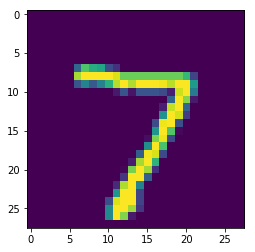

In [64]:
import matplotlib.pyplot as plt
matrix_in = matrix_in.reshape((28,28))
img = plt.imshow(matrix_in)
img

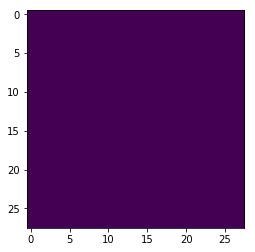

In [65]:
matrix_out = matrix_out.reshape(28, 28)
img = plt.imshow(matrix_out)
img

In [ ]:
matrix_in.freebuffer()
# dma_in.stop()

matrix_out.freebuffer()
# dma_out.stop()